<a href="https://colab.research.google.com/github/MscData/NewRepository/blob/main/Electricity_Spot_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Import/Load

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2022_ Test Data Science_demande.csv to 2022_ Test Data Science_demande.csv
Saving 2022_ Test Data Science_prix_gaz V2.csv to 2022_ Test Data Science_prix_gaz V2.csv
Saving 2022_ Test Data Science_prix_petrole.csv to 2022_ Test Data Science_prix_petrole.csv
Saving 2022_ Test Data Science_prix_spot_elec.csv to 2022_ Test Data Science_prix_spot_elec.csv
Saving 2022_ Test Data Science_production.csv to 2022_ Test Data Science_production.csv
Saving 2022_ Test Data Science_production_fatale.csv to 2022_ Test Data Science_production_fatale.csv


In [3]:
import pandas as pd
# student_data = pd.read_csv('/content/student_data.csv')
df_demande_consumption = pd.read_csv('2022_ Test Data Science_demande.csv')
df_prix_gaz = pd.read_csv('2022_ Test Data Science_prix_gaz V2.csv')
df_petrole = pd.read_csv('2022_ Test Data Science_prix_petrole.csv')
df_prix_spot_elect = pd.read_csv('2022_ Test Data Science_prix_spot_elec.csv')
df_production = pd.read_csv('2022_ Test Data Science_production.csv')
df_fatale = pd.read_csv('2022_ Test Data Science_production_fatale.csv')

In [4]:
print('demande consumption : ', df_demande_consumption.shape)
print('prix gaze :', df_prix_gaz.shape)
print('petrole : ', df_petrole.shape)
print('prix spot elec : ', df_prix_spot_elect.shape)
print('production :', df_production.shape)
print('fatale : ', df_fatale.shape)

demande consumption :  (69490, 2)
prix gaze : (712, 2)
petrole :  (24, 2)
prix spot elec :  (17520, 2)
production : (17277, 2)
fatale :  (17495, 2)


In [5]:
df_demande_consumption.head()

,date_heure,demande
0,2018-01-01 00:00:00,56.80
1,2018-01-01 00:15:00,56.25
2,2018-01-01 00:30:00,55.70
3,2018-01-01 00:45:00,54.80
4,2018-01-01 01:00:00,53.90


In [6]:
# Transform demande to hourly_demande
import pandas as pd

# Convert the 'date_heure' column to datetime type
df_demande_consumption['date_heure'] = pd.to_datetime(df_demande_consumption['date_heure'])

# Group the data by hour and take the average of 'demande' within that hour
hourly_demande = df_demande_consumption.groupby(pd.Grouper(key='date_heure', freq='H'))['demande'].mean() # .mean()

# Reset the index to have the datetime as a column
hourly_demande = hourly_demande.reset_index()

# Print the hourly data
print(hourly_demande) 

               date_heure  demande
0     2018-01-01 00:00:00  55.8875
1     2018-01-01 01:00:00  54.3375
2     2018-01-01 02:00:00  53.1750
3     2018-01-01 03:00:00  49.6125
4     2018-01-01 04:00:00  46.8625
...                   ...      ...
17515 2019-12-31 19:00:00  69.9125
17516 2019-12-31 20:00:00  66.5500
17517 2019-12-31 21:00:00  63.9875
17518 2019-12-31 22:00:00  64.6125
17519 2019-12-31 23:00:00  67.5625

[17520 rows x 2 columns]


### 2. Features Engineering

In [10]:
# Convert date_heure column to datetime format
# hourly_demande['date_heure'] = pd.to_datetime(hourly_demande['date_heure'])
df_production['date_heure'] = pd.to_datetime(df_production['date_heure'])
df_fatale['date_heure'] = pd.to_datetime(df_fatale['date_heure'])
df_prix_spot_elect['date_heure'] = pd.to_datetime(df_prix_spot_elect['date_heure'])
df_prix_gaz['date_heure'] = pd.to_datetime(df_prix_gaz['date_heure'])
df_petrole['date_heure'] = pd.to_datetime(df_petrole['date_heure'])

In [11]:
df_prix_gaz

,date_heure,prix_gaz
0,2018-01-01,19.218
1,2018-01-02,19.515
2,2018-01-03,19.515
3,2018-01-04,19.116
4,2018-01-05,19.173
...,...,...
707,2019-12-27,11.043
708,2019-12-28,12.164
709,2019-12-29,12.164
710,2019-12-30,12.154


In [14]:
import pandas as pd

# Convert the 'date' column to a datetime type
# df_prix_gaz['date_heure'] = pd.to_datetime(df_prix_gaz['date_heure'])

# Set the 'date' column as the index
df_prix_gaz = df_prix_gaz.set_index('date_heure')

# Interpolate the missing values (if any) between consecutive days
hourly_prix_gaz = df_prix_gaz.interpolate()

# Interpolate the missing values up to '2019-12-31 23:45:00'
hourly_prix_gaz = df_prix_gaz.interpolate(limit=1, limit_direction='both').loc[:'2019-12-31 23:45:00']

# Resample the data at an hourly frequency and forward fill the missing values
hourly_prix_gaz = df_prix_gaz.resample('H').ffill()

hourly_prix_gaz.tail(5)

,prix_gaz
date_heure,
2019-12-30 20:00:00,12.154
2019-12-30 21:00:00,12.154
2019-12-30 22:00:00,12.154
2019-12-30 23:00:00,12.154
2019-12-31 00:00:00,12.160


In [15]:
df_prix_gaz.columns

Index(['prix_gaz'], dtype='object')

In [16]:
df_petrole

,date_heure,prix_petrole
0,2018-01-01,56.6
1,2018-02-01,52.9
2,2018-03-01,53.5
3,2018-04-01,58.7
4,2018-05-01,65.2
5,2018-06-01,63.7
6,2018-07-01,63.5
7,2018-08-01,62.8
8,2018-09-01,67.7
9,2018-10-01,70.6


In [17]:
import pandas as pd

# Convert the 'date' column to a datetime type
#df_petrole['date_heure'] = pd.to_datetime(df_prix_gaz['date_heure'])

# Set the 'date' column as the index
hourly_petrol = df_petrole.set_index('date_heure')

# Interpolate the missing values (if any) between consecutive days
hourly_petrol = hourly_petrol.interpolate()

# Resample the data at an hourly frequency and forward fill the missing values
hourly_petrol = hourly_petrol.resample('H').ffill()
hourly_petrol.tail(10)

,prix_petrole
date_heure,
2019-11-30 15:00:00,57.2
2019-11-30 16:00:00,57.2
2019-11-30 17:00:00,57.2
2019-11-30 18:00:00,57.2
2019-11-30 19:00:00,57.2
2019-11-30 20:00:00,57.2
2019-11-30 21:00:00,57.2
2019-11-30 22:00:00,57.2
2019-11-30 23:00:00,57.2


In [18]:
hourly_petrol

,prix_petrole
date_heure,
2018-01-01 00:00:00,56.6
2018-01-01 01:00:00,56.6
2018-01-01 02:00:00,56.6
2018-01-01 03:00:00,56.6
2018-01-01 04:00:00,56.6
...,...
2019-11-30 20:00:00,57.2
2019-11-30 21:00:00,57.2
2019-11-30 22:00:00,57.2


In [19]:
hourly_demande.shape

(17520, 2)

In [20]:
df_production.shape

(17277, 2)

In [21]:
df_fatale.shape

(17495, 2)

In [22]:
# DataFrame Merge
df1 = pd.merge(hourly_demande, df_production, on = 'date_heure',  how='left')
df2 = pd.merge(df1, df_fatale, on = 'date_heure',  how='left')
df3 = pd.merge(df2, df_prix_spot_elect, on = 'date_heure',  how='left')
df4 = pd.merge(df3, hourly_prix_gaz, on = 'date_heure',  how='left')
df = pd.merge(df4, hourly_petrol, on = 'date_heure',  how='left')


In [23]:
df

,date_heure,demande,production,production_fatale,prix_spot_elec,prix_gaz,prix_petrole
0,2018-01-01 00:00:00,55.8875,57.071,15.971,6.74,19.218,56.6
1,2018-01-01 01:00:00,54.3375,54.221,15.907,4.74,19.218,56.6
2,2018-01-01 02:00:00,53.1750,52.623,15.492,3.66,19.218,56.6
3,2018-01-01 03:00:00,49.6125,51.954,14.986,1.26,19.218,56.6
4,2018-01-01 04:00:00,46.8625,50.341,14.424,-20.10,19.218,56.6
...,...,...,...,...,...,...,...
17519,2019-12-31 19:00:00,69.9125,73.367,11.127,46.00,NaN,NaN
17520,2019-12-31 20:00:00,66.5500,70.774,10.812,42.20,NaN,NaN
17521,2019-12-31 21:00:00,63.9875,69.412,10.565,39.74,NaN,NaN
17522,2019-12-31 22:00:00,64.6125,68.740,10.406,38.88,NaN,NaN


In [24]:
# Index Order
df = df.reindex(columns=["date_heure", "demande", "production", "production_fatale", "prix_gaz", "prix_petrole", "prix_spot_elec"])
df

,date_heure,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec
0,2018-01-01 00:00:00,55.8875,57.071,15.971,19.218,56.6,6.74
1,2018-01-01 01:00:00,54.3375,54.221,15.907,19.218,56.6,4.74
2,2018-01-01 02:00:00,53.1750,52.623,15.492,19.218,56.6,3.66
3,2018-01-01 03:00:00,49.6125,51.954,14.986,19.218,56.6,1.26
4,2018-01-01 04:00:00,46.8625,50.341,14.424,19.218,56.6,-20.10
...,...,...,...,...,...,...,...
17519,2019-12-31 19:00:00,69.9125,73.367,11.127,NaN,NaN,46.00
17520,2019-12-31 20:00:00,66.5500,70.774,10.812,NaN,NaN,42.20
17521,2019-12-31 21:00:00,63.9875,69.412,10.565,NaN,NaN,39.74
17522,2019-12-31 22:00:00,64.6125,68.740,10.406,NaN,NaN,38.88


In [25]:
df.isna().sum()

date_heure             0
demande              142
production           244
production_fatale     27
prix_gaz              23
prix_petrole         743
prix_spot_elec         2
dtype: int64

In [26]:
# Replace the NAN values by the colomn mean
df['demande'].fillna(df['demande'].mean(), inplace=True)
df['production'].fillna(df['production'].mean(), inplace=True)
df['production_fatale'].fillna(df['production_fatale'].mean(), inplace=True)
df['prix_gaz'].fillna(df['prix_gaz'].interpolate(), inplace=True)
df['prix_petrole'].fillna(df['prix_petrole'].interpolate(), inplace=True)
df['prix_spot_elec'].fillna(df['prix_spot_elec'].mean(), inplace=True)

df

,date_heure,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec
0,2018-01-01 00:00:00,55.8875,57.071,15.971,19.218,56.6,6.74
1,2018-01-01 01:00:00,54.3375,54.221,15.907,19.218,56.6,4.74
2,2018-01-01 02:00:00,53.1750,52.623,15.492,19.218,56.6,3.66
3,2018-01-01 03:00:00,49.6125,51.954,14.986,19.218,56.6,1.26
4,2018-01-01 04:00:00,46.8625,50.341,14.424,19.218,56.6,-20.10
...,...,...,...,...,...,...,...
17519,2019-12-31 19:00:00,69.9125,73.367,11.127,12.160,60.4,46.00
17520,2019-12-31 20:00:00,66.5500,70.774,10.812,12.160,60.4,42.20
17521,2019-12-31 21:00:00,63.9875,69.412,10.565,12.160,60.4,39.74
17522,2019-12-31 22:00:00,64.6125,68.740,10.406,12.160,60.4,38.88


In [27]:
df.dtypes

date_heure           datetime64[ns]
demande                     float64
production                  float64
production_fatale           float64
prix_gaz                    float64
prix_petrole                float64
prix_spot_elec              float64
dtype: object

In [28]:
df.isna().sum()

date_heure           0
demande              0
production           0
production_fatale    0
prix_gaz             0
prix_petrole         0
prix_spot_elec       0
dtype: int64

In [29]:
df.describe()

,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec
count,17524.000000,17524.000000,17524.000000,17524.000000,17524.000000,17524.000000
mean,53.095443,60.118617,11.097157,18.017273,58.837354,44.824731
std,13.199921,10.019760,5.690086,5.739360,5.181787,17.246539
min,0.707000,33.854000,2.927000,0.000000,49.800000,-31.820000
25%,44.587500,52.702000,7.863750,12.874000,54.000000,33.990000
50%,52.118750,58.977000,9.944000,18.781000,57.200000,43.770000
75%,61.700000,66.900500,12.592000,22.140000,63.500000,54.832500
max,116.375000,89.881000,56.030000,43.041000,70.600000,259.950000


### 3. Data Exploration/Visualistaion

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import DataScienceHelper as dsh
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

%matplotlib inline

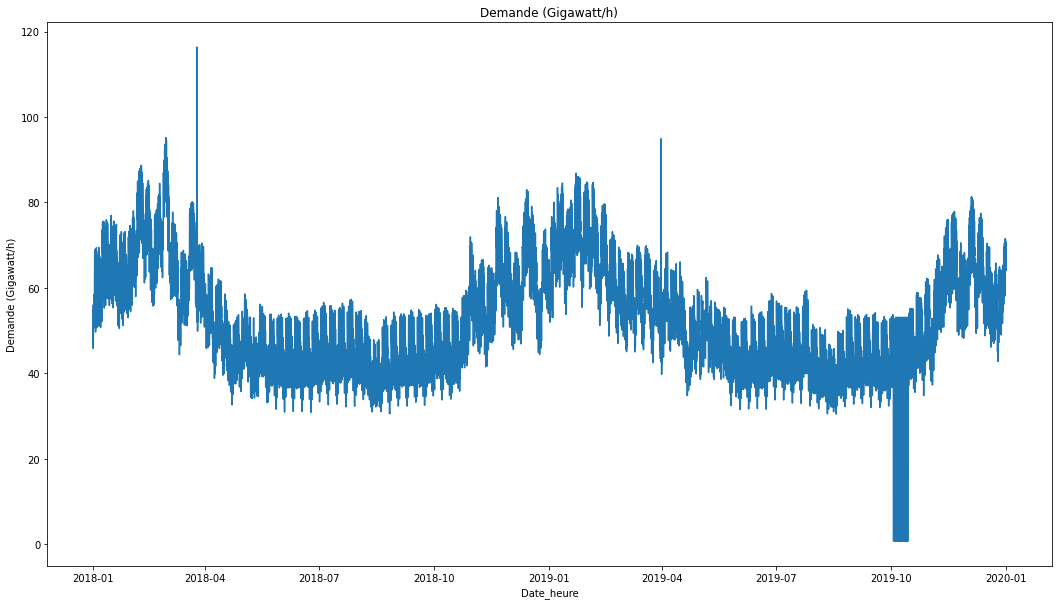

In [31]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(df.date_heure, df.demande)
axis.set_title('Demande (Gigawatt/h)')
axis.set_ylabel('Demande (Gigawatt/h)')
axis.set_xlabel('Date_heure')
plt.show()

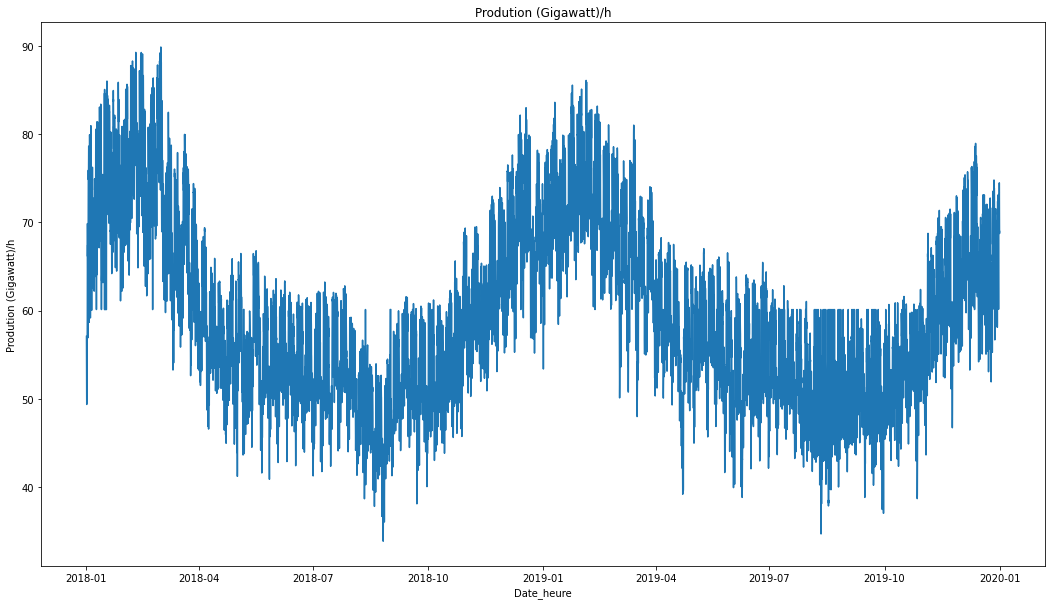

In [32]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(df.date_heure, df.production)
axis.set_title('Prodution (Gigawatt)/h')
axis.set_ylabel('Prodution (Gigawatt)/h')
axis.set_xlabel('Date_heure')
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


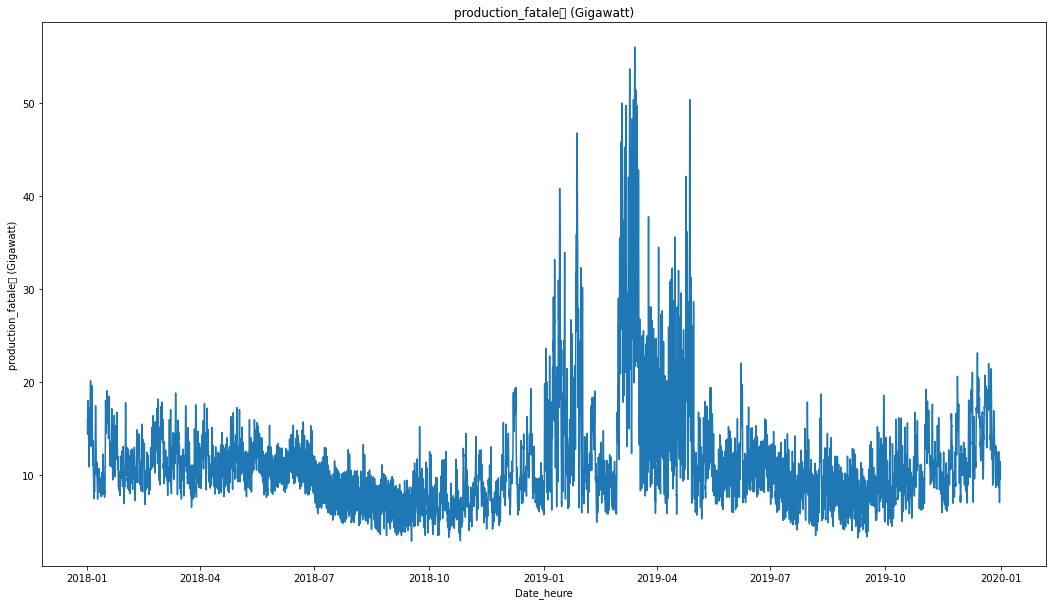

In [33]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(df.date_heure, df.production_fatale)
axis.set_title('production_fatale	 (Gigawatt)')
axis.set_ylabel('production_fatale	 (Gigawatt)')
axis.set_xlabel('Date_heure')
plt.show()

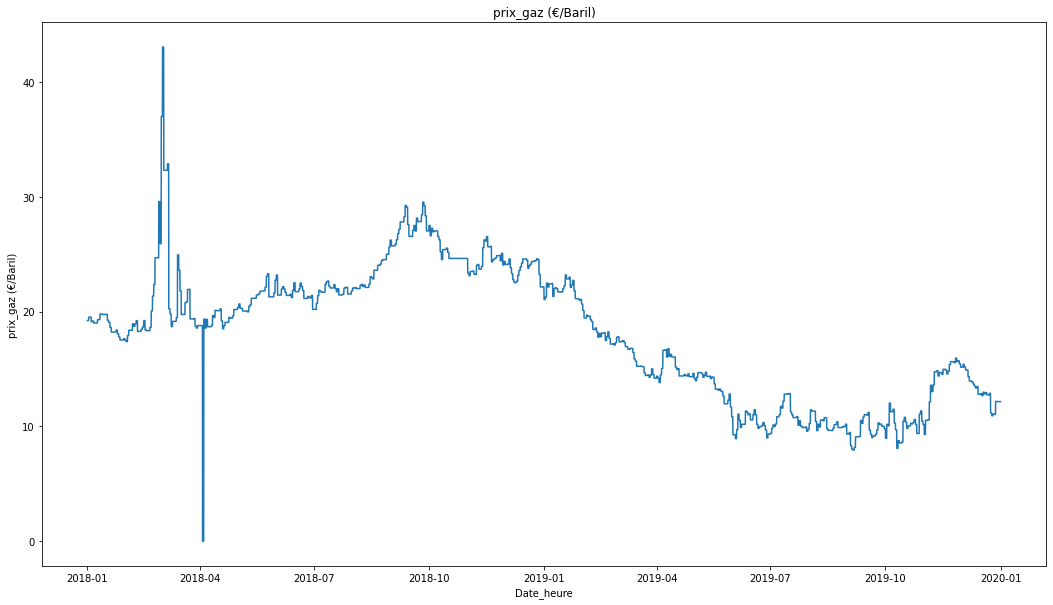

In [34]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(df.date_heure, df.prix_gaz)
axis.set_title('prix_gaz (€/Baril)')
axis.set_ylabel('prix_gaz (€/Baril)')
axis.set_xlabel('Date_heure')
plt.show()

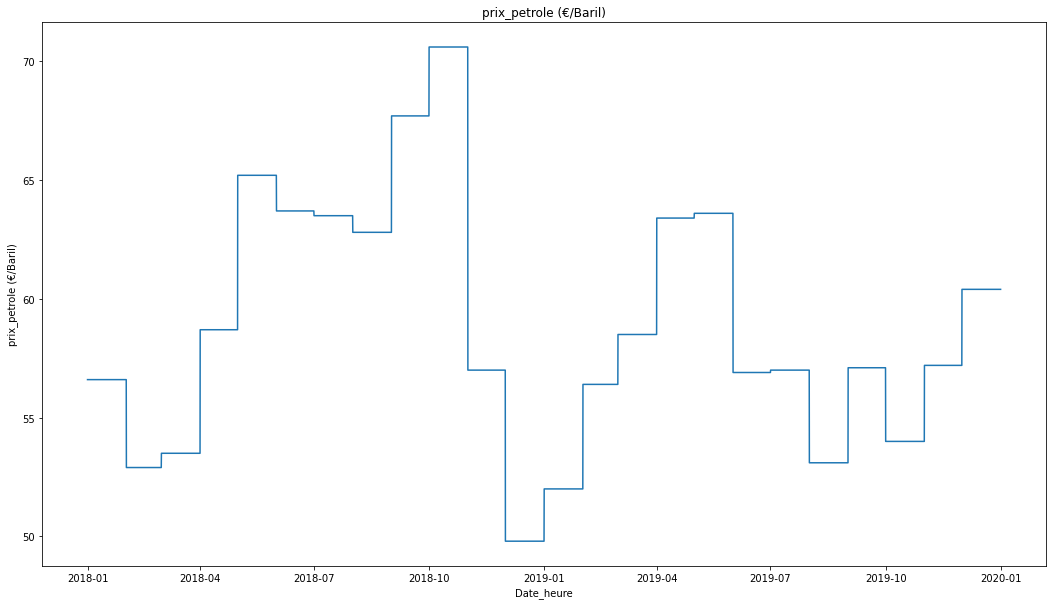

In [35]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(df.date_heure, df.prix_petrole)
axis.set_title('prix_petrole (€/Baril)')
axis.set_ylabel('prix_petrole (€/Baril)')
axis.set_xlabel('Date_heure')
plt.show()

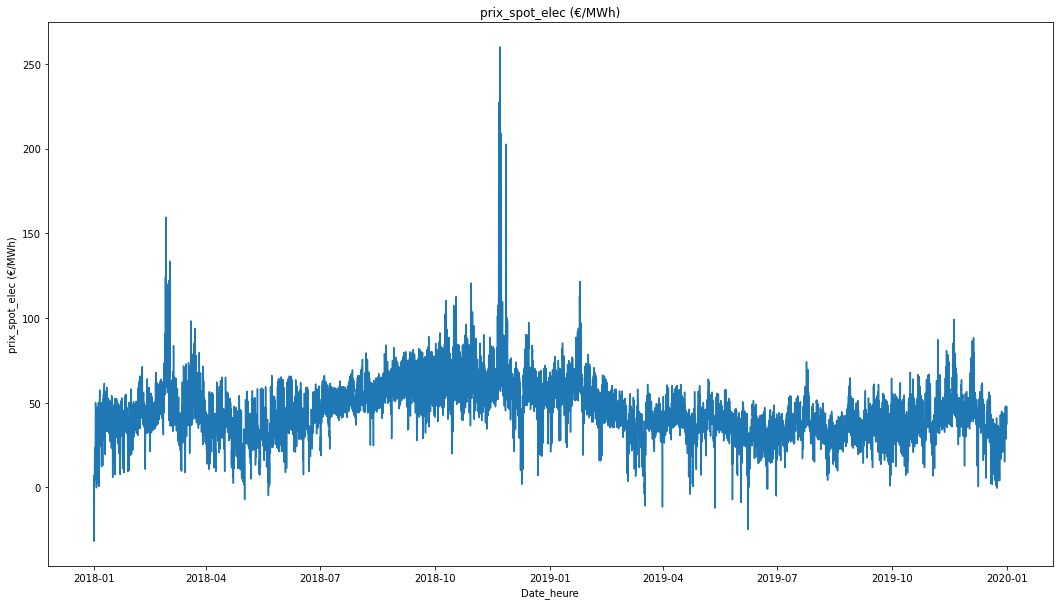

In [36]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot(df.date_heure, df.prix_spot_elec)
axis.set_title('prix_spot_elec (€/MWh)')
axis.set_ylabel('prix_spot_elec (€/MWh)')
axis.set_xlabel('Date_heure')
plt.show()

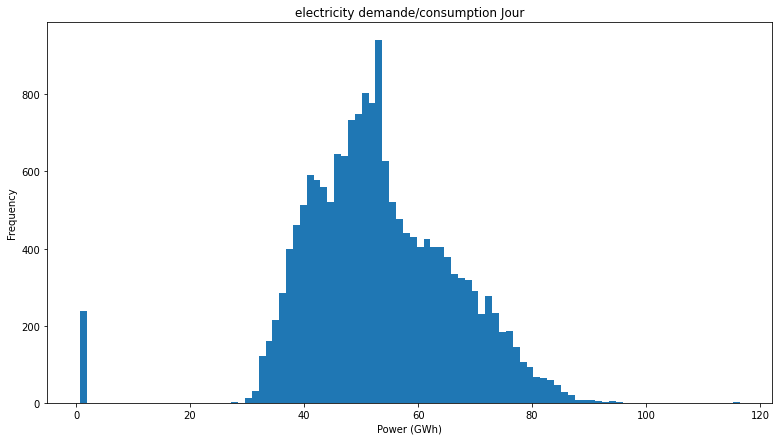

In [37]:
fig = df['demande'].plot.hist(figsize=(13,7),title="electricity demande/consumption Jour",bins= 96)
plt.xlabel("Power (GWh)")
plt.show()

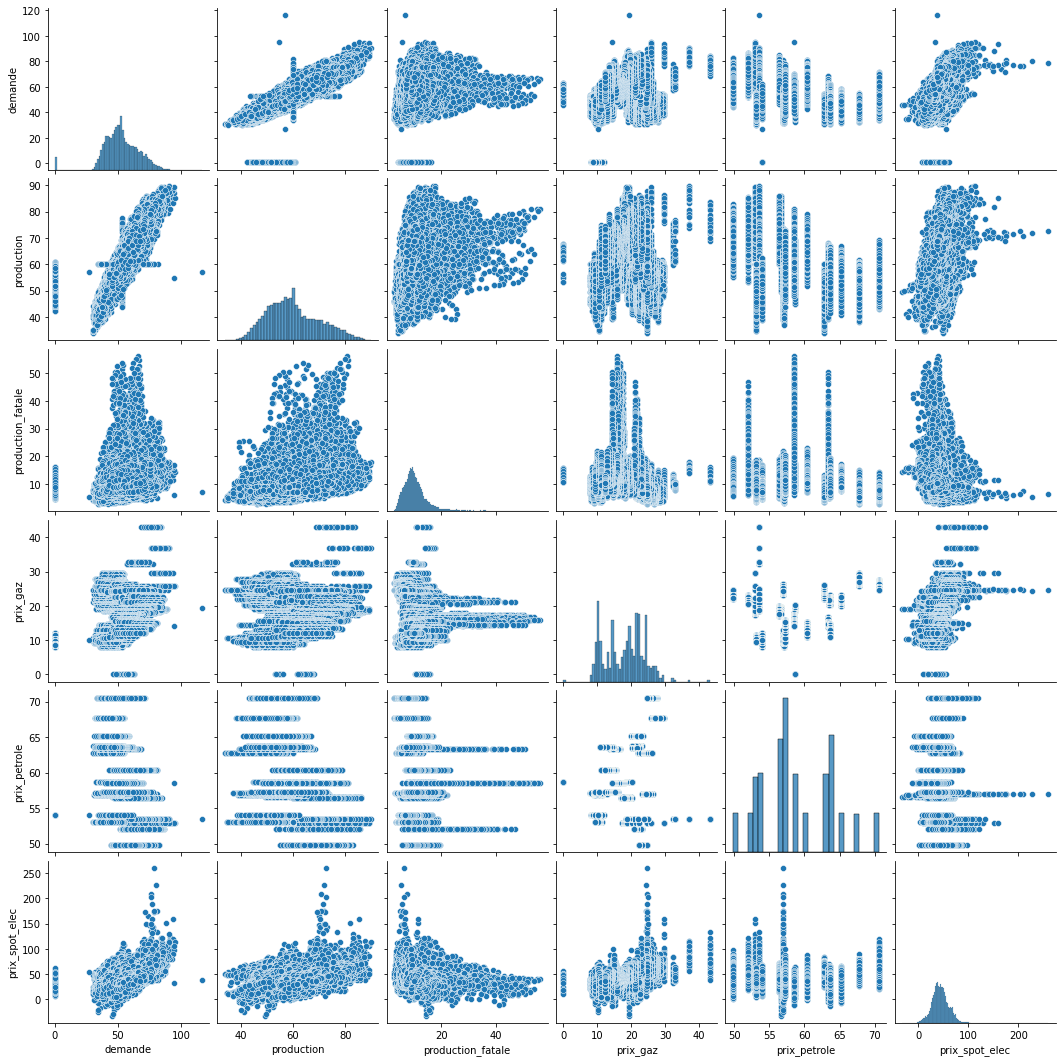

In [38]:
sns.pairplot(df)
plt.show()

In [39]:
# sns.pairplot(df, hue='prix_spot_elec', height=2.5);#

<AxesSubplot:>

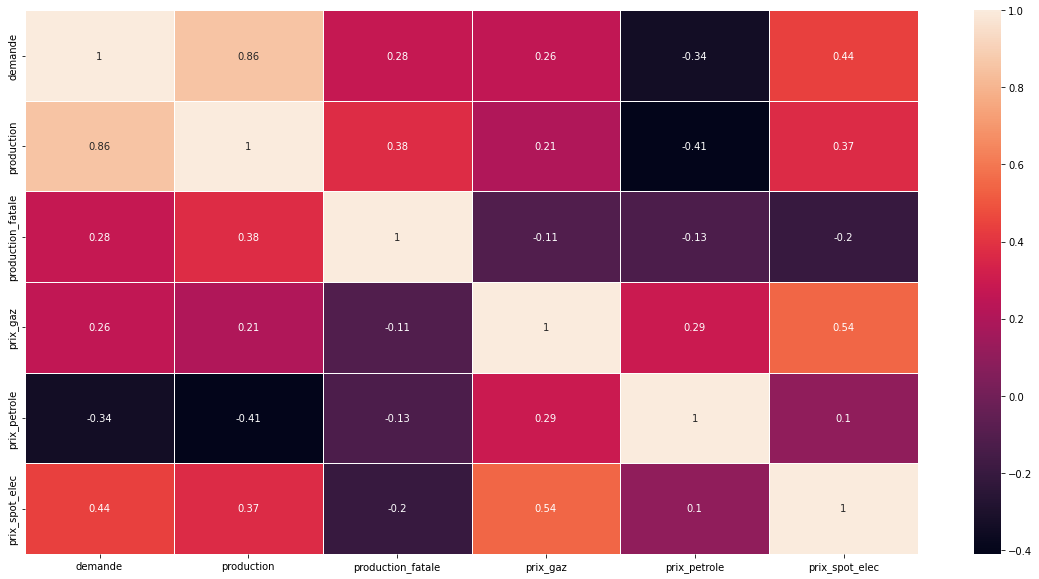

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=.5)

In [41]:
df.corr()

,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec
demande,1.000000,0.855620,0.277492,0.261159,-0.341212,0.438676
production,0.855620,1.000000,0.376666,0.206159,-0.410648,0.371273
production_fatale,0.277492,0.376666,1.000000,-0.108914,-0.127118,-0.204250
prix_gaz,0.261159,0.206159,-0.108914,1.000000,0.290437,0.542650
prix_petrole,-0.341212,-0.410648,-0.127118,0.290437,1.000000,0.100867
prix_spot_elec,0.438676,0.371273,-0.204250,0.542650,0.100867,1.000000


In [42]:
# Correlation % FinalGrade target
df.corr()['prix_spot_elec'].sort_values(ascending=False)

prix_spot_elec       1.000000
prix_gaz             0.542650
demande              0.438676
production           0.371273
prix_petrole         0.100867
production_fatale   -0.204250
Name: prix_spot_elec, dtype: float64

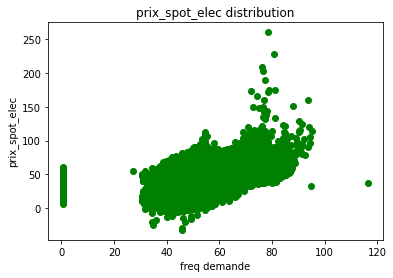

In [43]:
plt.scatter(df.demande,df.prix_spot_elec,c='green')
plt.xlabel("freq demande")
plt.ylabel("prix_spot_elec")
plt.title("prix_spot_elec distribution")
plt.show()

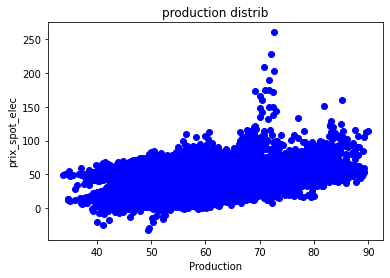

In [44]:
plt.scatter(df.production,df.prix_spot_elec,c='blue')
plt.xlabel("Production")
plt.ylabel("prix_spot_elec")
plt.title("production distrib")
plt.show()

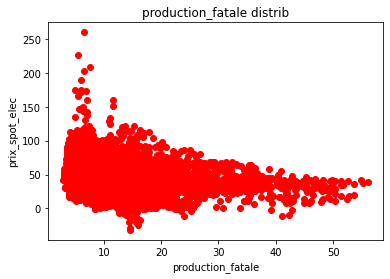

In [45]:
plt.scatter(df.production_fatale,df.prix_spot_elec,c='red')
plt.xlabel("production_fatale")
plt.ylabel("prix_spot_elec")
plt.title("production_fatale distrib")
plt.show()

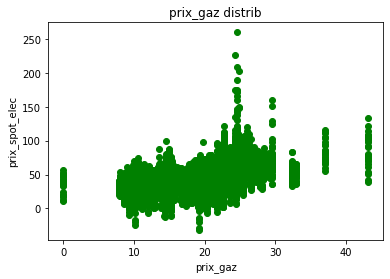

In [46]:
plt.scatter(df.prix_gaz,df.prix_spot_elec,c='green')
plt.xlabel("prix_gaz")
plt.ylabel("prix_spot_elec")
plt.title("prix_gaz distrib")
plt.show()

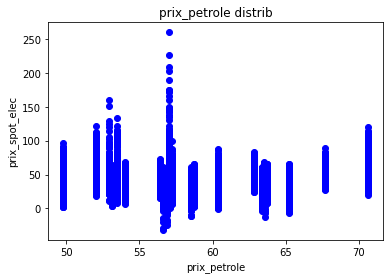

In [47]:
plt.scatter(df.prix_petrole,df.prix_spot_elec,c='blue')
plt.xlabel("prix_petrole")
plt.ylabel("prix_spot_elec")
plt.title("prix_petrole distrib")
plt.show()

In [48]:
df.head()

,date_heure,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec
0,2018-01-01 00:00:00,55.8875,57.071,15.971,19.218,56.6,6.74
1,2018-01-01 01:00:00,54.3375,54.221,15.907,19.218,56.6,4.74
2,2018-01-01 02:00:00,53.1750,52.623,15.492,19.218,56.6,3.66
3,2018-01-01 03:00:00,49.6125,51.954,14.986,19.218,56.6,1.26
4,2018-01-01 04:00:00,46.8625,50.341,14.424,19.218,56.6,-20.10


In [49]:
# from datetime import date
import datetime
import calendar

In [50]:
def get_day(x):
    day = calendar.day_name[x.weekday()]
    return day

In [51]:


# df['Date'] = df['date_heure'].map(lambda x: x.date)
df['Year'] = df['date_heure'].map(lambda x: x.year)
df['Month'] = df['date_heure'].map(lambda x: x.month)
df['week'] = df['date_heure'].map(lambda x: x.week)
df['week_day'] = df['date_heure'].map(get_day)
df['Day'] = df['date_heure'].map(lambda x: x.day)
df['Hour'] = df['date_heure'].map(lambda x: x.hour)
# df['minute'] = df['date_heure'].map(lambda x: x.minute)


In [52]:
df

,date_heure,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec,Year,Month,week,week_day,Day,Hour
0,2018-01-01 00:00:00,55.8875,57.071,15.971,19.218,56.6,6.74,2018,1,1,Monday,1,0
1,2018-01-01 01:00:00,54.3375,54.221,15.907,19.218,56.6,4.74,2018,1,1,Monday,1,1
2,2018-01-01 02:00:00,53.1750,52.623,15.492,19.218,56.6,3.66,2018,1,1,Monday,1,2
3,2018-01-01 03:00:00,49.6125,51.954,14.986,19.218,56.6,1.26,2018,1,1,Monday,1,3
4,2018-01-01 04:00:00,46.8625,50.341,14.424,19.218,56.6,-20.10,2018,1,1,Monday,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17519,2019-12-31 19:00:00,69.9125,73.367,11.127,12.160,60.4,46.00,2019,12,1,Tuesday,31,19
17520,2019-12-31 20:00:00,66.5500,70.774,10.812,12.160,60.4,42.20,2019,12,1,Tuesday,31,20
17521,2019-12-31 21:00:00,63.9875,69.412,10.565,12.160,60.4,39.74,2019,12,1,Tuesday,31,21
17522,2019-12-31 22:00:00,64.6125,68.740,10.406,12.160,60.4,38.88,2019,12,1,Tuesday,31,22


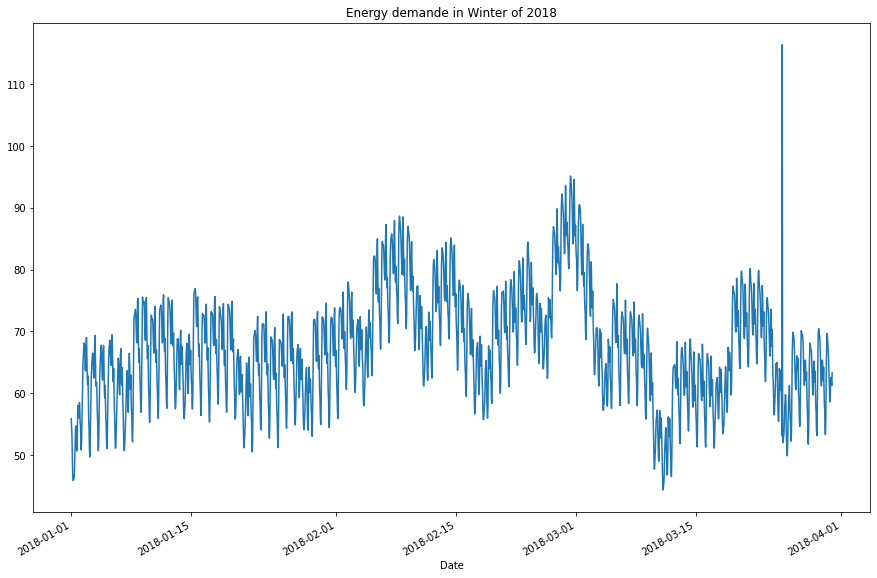

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Convert the date_heure column to a pandas DatetimeIndex
df['date_heure'] = pd.to_datetime(df['date_heure'])
df = df.set_index('date_heure')

# Sort the DataFrame by the date_heure column
df = df.sort_values('date_heure')

# Filter the data for the winter of 2018-2019
winter_data_18 = df.loc[(df.index >= '2018-01-01') & (df.index < '2018-03-31')]

# Plot the data with the date_heure values on the x-axis
fig = winter_data_18['demande'].plot(figsize=(15,10), title='Energy demande in Winter of 2018', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


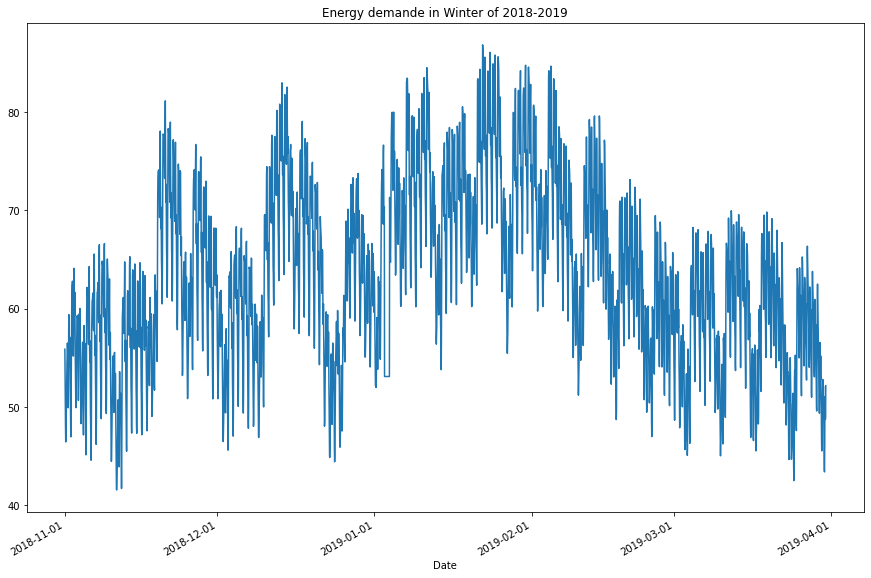

In [54]:
# Filter the data for the winter of 2018-2019
winter_data_19 = df.loc[(df.index >= '2018-11-01') & (df.index < '2019-03-31')]

# Plot the data with the date_heure values on the x-axis
fig = winter_data_19['demande'].plot(figsize=(15,10), title='Energy demande in Winter of 2018-2019', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


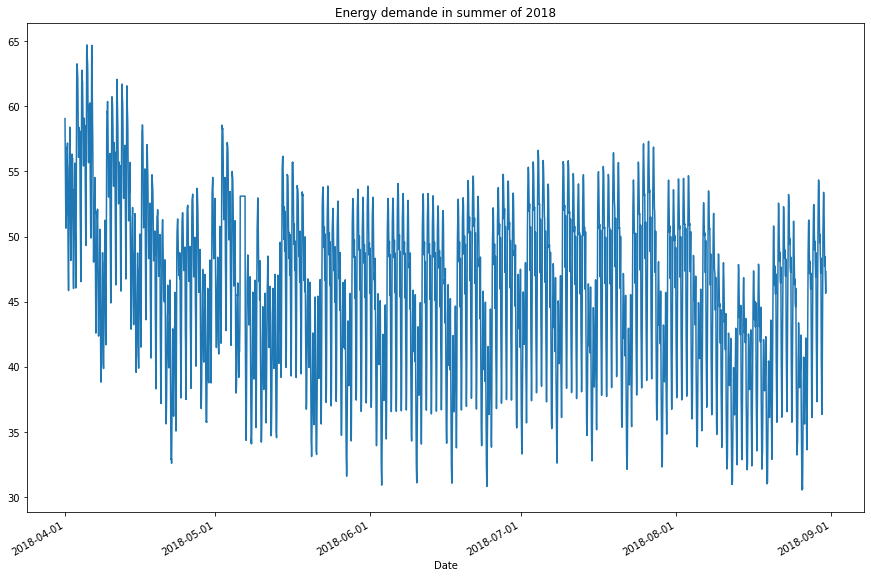

In [55]:
# Filter the data for the winter of 2018-2019
summer_data_18 = df.loc[(df.index >= '2018-04-01') & (df.index < '2018-08-31')]

# Plot the data with the date_heure values on the x-axis
fig = summer_data_18['demande'].plot(figsize=(15,10), title='Energy demande in summer of 2018', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


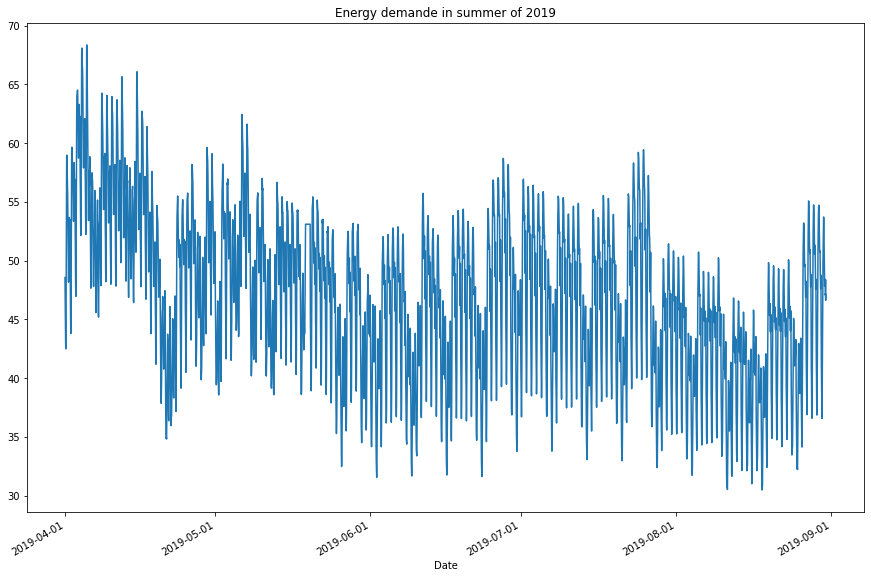

In [56]:
# Filter the data for the winter of 2018-2019
summer_data_19 = df.loc[(df.index >= '2019-04-01') & (df.index < '2019-08-31')]

# Plot the data with the date_heure values on the x-axis
fig = summer_data_19['demande'].plot(figsize=(15,10), title='Energy demande in summer of 2019', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


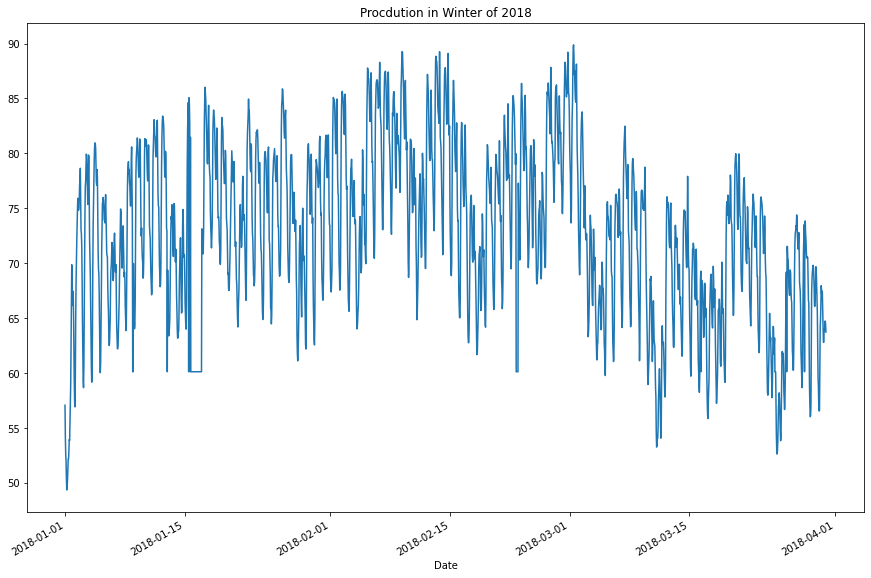

In [57]:
# Filter the data for the winter of 2018-2019
winter_production_18 = df.loc[(df.index >= '2018-01-01') & (df.index < '2018-03-31')]

# Plot the data with the date_heure values on the x-axis
fig = winter_production_18['production'].plot(figsize=(15,10), title='Procdution in Winter of 2018', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()

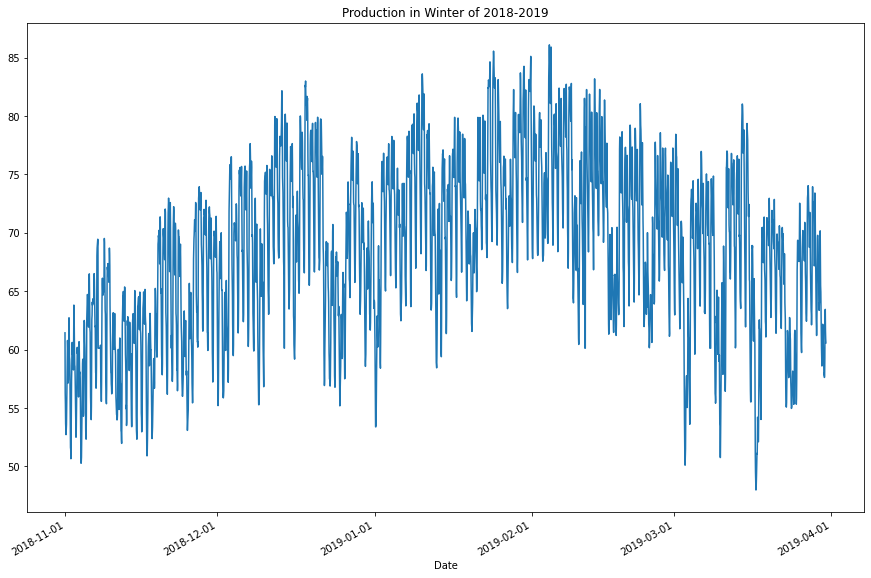

In [58]:
# Filter the data for the winter of 2018-2019
winter_prodction_19 = df.loc[(df.index >= '2018-11-01') & (df.index < '2019-03-31')]

# Plot the data with the date_heure values on the x-axis
fig = winter_prodction_19['production'].plot(figsize=(15,10), title='Production in Winter of 2018-2019', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


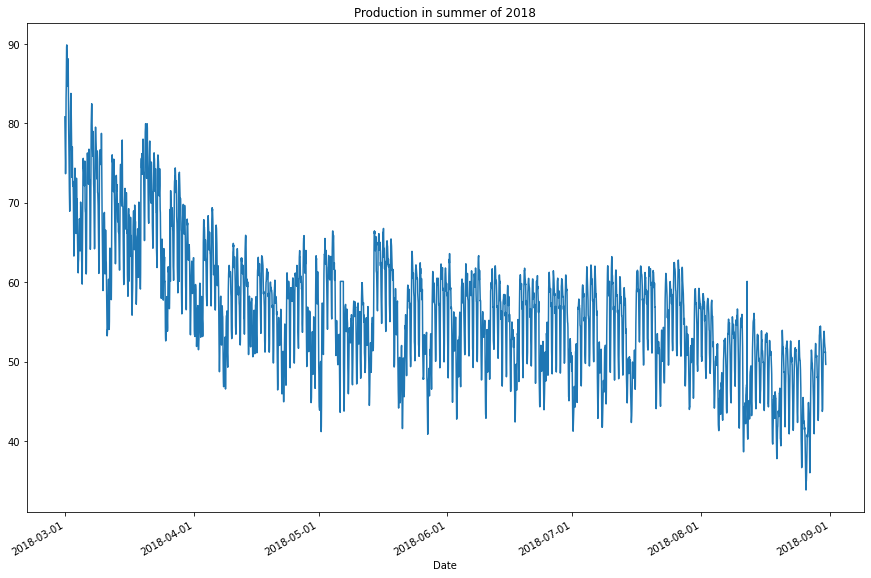

In [59]:
# Filter the data for the winter of 2018-2019
summer_prodcution_18 = df.loc[(df.index >= '2018-03-01') & (df.index < '2018-08-31')]

# Plot the data with the date_heure values on the x-axis
fig = summer_prodcution_18['production'].plot(figsize=(15,10), title='Production in summer of 2018', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


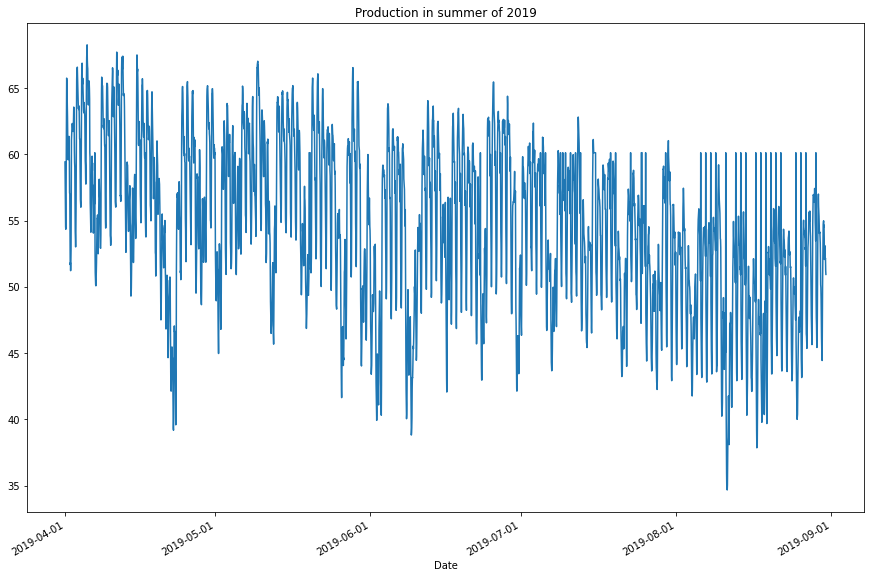

In [60]:
# Filter the data for the winter of 2018-2019
summer_production_19 = df.loc[(df.index >= '2019-04-01') & (df.index < '2019-08-31')]

# Plot the data with the date_heure values on the x-axis
fig = summer_production_19['production'].plot(figsize=(15,10), title='Production in summer of 2019', x_compat=True)

# Set the x-axis label and tick format
fig.set_xlabel('Date')
date_form = mdates.DateFormatter("%Y-%m-%d")
fig.xaxis.set_major_formatter(date_form)

# Show the plot
plt.show()


In [61]:
df

,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec,Year,Month,week,week_day,Day,Hour
date_heure,,,,,,,,,,,,
2018-01-01 00:00:00,55.8875,57.071,15.971,19.218,56.6,6.74,2018,1,1,Monday,1,0
2018-01-01 01:00:00,54.3375,54.221,15.907,19.218,56.6,4.74,2018,1,1,Monday,1,1
2018-01-01 02:00:00,53.1750,52.623,15.492,19.218,56.6,3.66,2018,1,1,Monday,1,2
2018-01-01 03:00:00,49.6125,51.954,14.986,19.218,56.6,1.26,2018,1,1,Monday,1,3
2018-01-01 04:00:00,46.8625,50.341,14.424,19.218,56.6,-20.10,2018,1,1,Monday,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,69.9125,73.367,11.127,12.160,60.4,46.00,2019,12,1,Tuesday,31,19
2019-12-31 20:00:00,66.5500,70.774,10.812,12.160,60.4,42.20,2019,12,1,Tuesday,31,20
2019-12-31 21:00:00,63.9875,69.412,10.565,12.160,60.4,39.74,2019,12,1,Tuesday,31,21


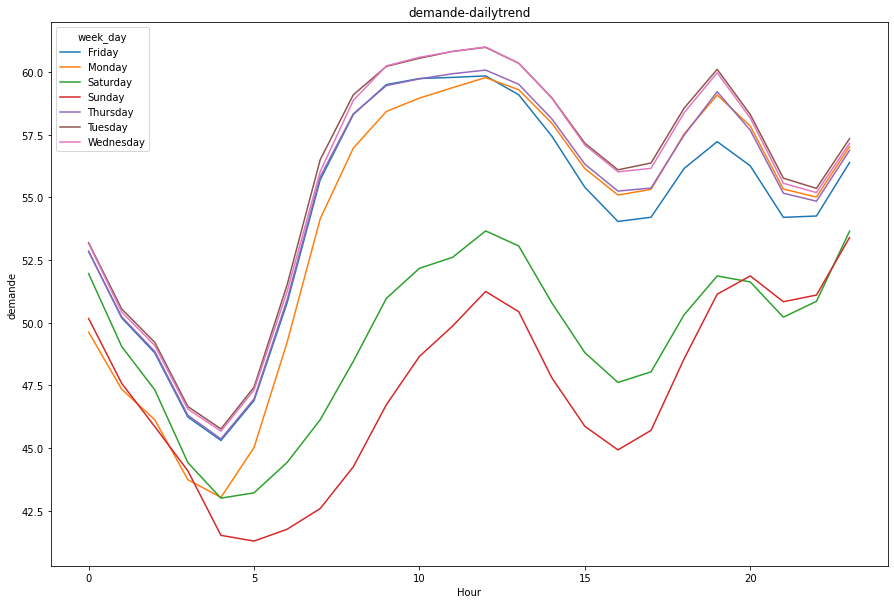

In [62]:
fig = df.pivot_table(index = df['Hour'],
                       columns = 'week_day',
                       values = 'demande',
                       aggfunc = 'mean').plot(figsize = (15,10),title = 'demande-dailytrend')
plt.ylabel("demande")
plt.show()

### 3. Data Pre-processing

In [63]:
df.corr()

,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec,Year,Month,week,Day,Hour
demande,1.000000,0.855620,0.277492,0.261159,-0.341212,0.438676,-0.063510,-0.282603,-0.285044,0.028782,0.191535
production,0.855620,1.000000,0.376666,0.206159,-0.410648,0.371273,-0.047973,-0.369329,-0.374066,-0.016060,0.233389
production_fatale,0.277492,0.376666,1.000000,-0.108914,-0.127118,-0.204250,0.268027,-0.337159,-0.332846,-0.030230,0.147135
prix_gaz,0.261159,0.206159,-0.108914,1.000000,0.290437,0.542650,-0.776617,-0.052154,-0.050764,-0.026967,-0.000153
prix_petrole,-0.341212,-0.410648,-0.127118,0.290437,1.000000,0.100867,-0.265385,0.140518,0.142699,0.006073,-0.000460
prix_spot_elec,0.438676,0.371273,-0.204250,0.542650,0.100867,1.000000,-0.311607,0.167347,0.174897,0.028722,0.251874
Year,-0.063510,-0.047973,0.268027,-0.776617,-0.265385,-0.311607,1.000000,-0.000115,-0.000126,-0.000166,0.000157
Month,-0.282603,-0.369329,-0.337159,-0.052154,0.140518,0.167347,-0.000115,1.000000,0.974203,0.012204,-0.000316
week,-0.285044,-0.374066,-0.332846,-0.050764,0.142699,0.174897,-0.000126,0.974203,1.000000,0.071378,-0.000345
Day,0.028782,-0.016060,-0.030230,-0.026967,0.006073,0.028722,-0.000166,0.012204,0.071378,1.000000,-0.000428


<AxesSubplot:>

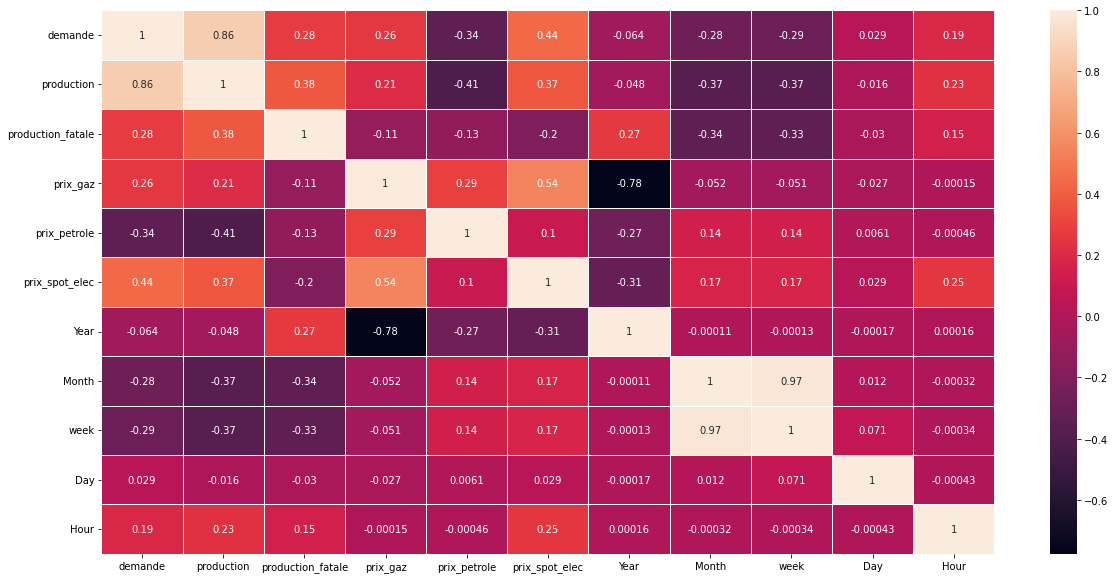

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=.5)

In [65]:
df.corr()['prix_spot_elec'].sort_values(ascending=False)

prix_spot_elec       1.000000
prix_gaz             0.542650
demande              0.438676
production           0.371273
Hour                 0.251874
week                 0.174897
Month                0.167347
prix_petrole         0.100867
Day                  0.028722
production_fatale   -0.204250
Year                -0.311607
Name: prix_spot_elec, dtype: float64

In [66]:
# pip install statsmodels


In [67]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

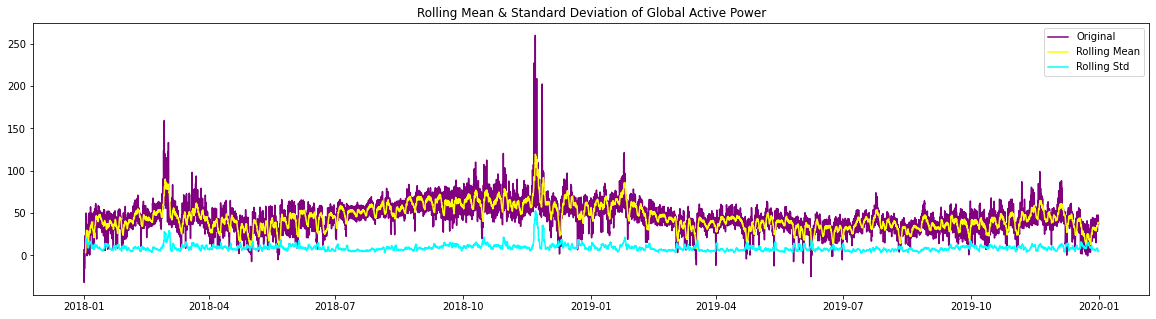

<Results of Dickey-Fuller Test>
Test Statistic                -7.422805e+00
p-value                        6.667569e-11
#Lags Used                     4.400000e+01
Number of Observations Used    1.747900e+04
Critical Value (1%)           -3.430724e+00
Critical Value (5%)           -2.861705e+00
Critical Value (10%)          -2.566858e+00
dtype: float64


In [68]:
test_stationarity(df.prix_spot_elec)

In [69]:
# Label Encoder/Transformation

from sklearn.preprocessing import LabelEncoder

df = df.copy()

le = LabelEncoder()
categorical_cols = list(df.select_dtypes(include=object))
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)
df[categorical_cols]

,week_day
date_heure,
2018-01-01 00:00:00,1
2018-01-01 01:00:00,1
2018-01-01 02:00:00,1
2018-01-01 03:00:00,1
2018-01-01 04:00:00,1
...,...
2019-12-31 19:00:00,5
2019-12-31 20:00:00,5
2019-12-31 21:00:00,5


In [70]:
df

,demande,production,production_fatale,prix_gaz,prix_petrole,prix_spot_elec,Year,Month,week,week_day,Day,Hour
date_heure,,,,,,,,,,,,
2018-01-01 00:00:00,55.8875,57.071,15.971,19.218,56.6,6.74,2018,1,1,1,1,0
2018-01-01 01:00:00,54.3375,54.221,15.907,19.218,56.6,4.74,2018,1,1,1,1,1
2018-01-01 02:00:00,53.1750,52.623,15.492,19.218,56.6,3.66,2018,1,1,1,1,2
2018-01-01 03:00:00,49.6125,51.954,14.986,19.218,56.6,1.26,2018,1,1,1,1,3
2018-01-01 04:00:00,46.8625,50.341,14.424,19.218,56.6,-20.10,2018,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,69.9125,73.367,11.127,12.160,60.4,46.00,2019,12,1,5,31,19
2019-12-31 20:00:00,66.5500,70.774,10.812,12.160,60.4,42.20,2019,12,1,5,31,20
2019-12-31 21:00:00,63.9875,69.412,10.565,12.160,60.4,39.74,2019,12,1,5,31,21


In [156]:
# Data Split
X = df.drop(columns = 'prix_spot_elec', axis =1)
y = df['prix_spot_elec']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# X_train_sorted = X_train.sort_values(by='date_heure', ascending=True)
# X_train_sorted

In [158]:
# y_train_sorted = y_train.sort_values
# y_train_sorted

In [159]:
# X_test

In [160]:
# y_test

In [161]:
X.columns

Index(['demande', 'production', 'production_fatale', 'prix_gaz',
       'prix_petrole', 'Year', 'Month', 'week', 'week_day', 'Day', 'Hour'],
      dtype='object')

In [162]:
# #y= pd.DataFrame
# y

In [163]:
# pip install --user xgboost

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
 
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 


RandomForestRegressor(random_state=0)

In [165]:
y_pred_xgb = XGB.predict(X_test)
y_pred_ln = lmodellineaire.predict(X_test)
y_pred_dtr = dtr_model.predict(X_test)
y_pred_reg = regressor.predict(X_test)

In [166]:
print(y_pred_xgb)
print(y_pred_ln)
print(y_pred_dtr)
print(y_pred_reg)

[60.890114 29.526463 63.23684  ... 19.674551 22.023382 30.317085]
[48.63033248 29.16569328 67.46365259 ... 27.71690131 47.06581829
 23.61577766]
[52.44 27.71 67.36 ... 14.84 34.66 21.03]
[59.9207 28.6942 63.7519 ... 22.7182 28.0095 30.5878]


In [167]:
print('XGBoost: ', abs(XGB.score(X_test,y_test)))
print('Linear regression model:', abs(lmodellineaire.score(X_test,y_test)))
print('Decision tree regression: ', abs(dtr_model.score(X_test,y_test)))
print('Random Forest regressor: ', abs(regressor.score(X_test,y_test)))

XGBoost:  0.9446659949695944
Linear regression model: 0.6074922394890652
Decision tree regression:  0.8688477092747137
Random Forest regressor:  0.9374350889776972


In [168]:
# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
# print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_xgb))
# print('R2 score:', metrics.r2_score(y_pred_xgb, y_test)) 

In [169]:
from sklearn import metrics

def get_metrics(a,b):        # Function to get all metrics into a list
    MEA = metrics.mean_absolute_error(a,b)
    MSE = metrics.mean_squared_error(a,b)
    RMSE= np.sqrt(metrics.mean_squared_error(a,b))
    r2 = metrics.r2_score(a,b) 
    return [MEA,MSE,RMSE,r2] 
get_metrics(y_pred_xgb,y_test)
get_metrics(y_pred_dtr,y_test)
get_metrics(y_pred_ln,y_test)
get_metrics(y_pred_reg,y_test)


metrics = {'XGBoost' : get_metrics(y_test,y_pred_xgb),      # Dictionary
           'Decision Tree Regressor' : get_metrics(y_test,y_pred_dtr),
           'Linear Regression' : get_metrics(y_test, y_pred_ln),
           'RandomForest Regression ': get_metrics(y_test, y_pred_reg)}

comparison = pd.DataFrame(metrics,index=['MEA','MSE','RMSE','R2'])  # DataFrame
comparison =comparison.transpose()
comparison

,MEA,MSE,RMSE,R2
XGBoost,3.046971,17.041465,4.128131,0.944666
Decision Tree Regressor,4.277248,40.391566,6.355436,0.868848
Linear Regression,7.917732,120.882395,10.994653,0.607492
RandomForest Regression,3.045622,19.268399,4.389579,0.937435


In [170]:
# I will compare the predictions and the real data in a data frame which are 'y_pred' and 'y_test' 
# The data frame requires the values to be 1 dimensional, so I squeezed the arrays into 1 dim.

import numpy as np

conc = pd.DataFrame({'real':np.squeeze(y_test),'predicted':np.squeeze(y_pred_reg)})
conc

,real,predicted
date_heure,,
2019-01-26 00:00:00,60.73,59.9207
2019-03-10 21:00:00,26.72,28.6942
2018-09-11 15:00:00,60.19,63.7519
2018-09-22 05:00:00,43.54,41.7338
2019-12-31 00:00:00,37.55,37.9949
...,...,...
2018-02-17 11:00:00,47.40,42.8621
2018-02-24 07:00:00,50.15,56.6793
2019-05-26 09:00:00,20.87,22.7182


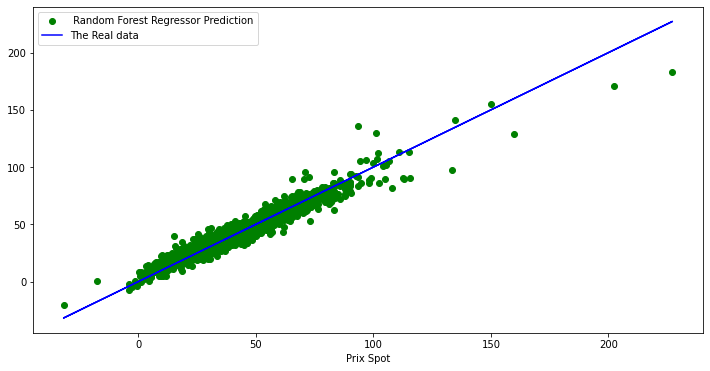

In [171]:
# The distribution of the predicted data on the real data.

plt.figure(figsize=(12,6))
plt.scatter(conc.real,conc.predicted,color='g', label = ' Random Forest Regressor Prediction')
plt.plot(conc.real,conc.real,color='b',label='The Real data')
plt.legend()
plt.xlabel("Prix Spot")
plt.show()

In [172]:
df.columns

Index(['demande', 'production', 'production_fatale', 'prix_gaz',
       'prix_petrole', 'prix_spot_elec', 'Year', 'Month', 'week', 'week_day',
       'Day', 'Hour'],
      dtype='object')

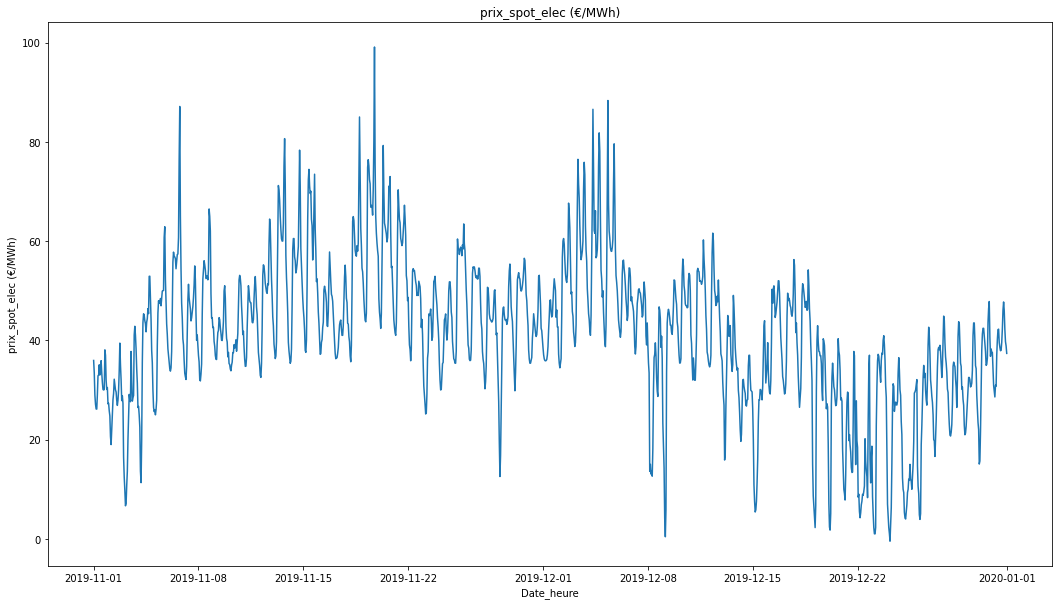

In [173]:
fig = plt.figure(figsize=(18,10))
axis = fig.gca()
axis.plot((df.prix_spot_elec).loc[df.index >= '2019-11-01'])
axis.set_title('prix_spot_elec (€/MWh)')
axis.set_ylabel('prix_spot_elec (€/MWh)')
axis.set_xlabel('Date_heure')
plt.show()

In [175]:
X.columns

Index(['demande', 'production', 'production_fatale', 'prix_gaz',
       'prix_petrole', 'Year', 'Month', 'week', 'week_day', 'Day', 'Hour'],
      dtype='object')

In [176]:
X_df_train = (X.loc[(X.index >= '2018-01-01') & (X.index < "2019-12-01")])
X_df_test = (X.loc[(X.index >= '2019-12-01')])

In [177]:
y_df_train = (y.loc[(y.index >= '2018-01-01') & (y.index < "2019-12-01")])
y_df_test = (y.loc[(y.index >= '2019-12-01')])

In [192]:
y_df_test.shape

(744,)

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Chargement des données
data = df


# # Création de la séquence temporelle
# seq_length = 12
# X = []
# y = []
# for i in range(seq_length, len(data)):
#     X.append(data.iloc[i-seq_length:i, 0])
#     y.append(data.iloc[i, 0])
# X = np.array(X)
# y = np.array(y)

# Division des données en ensemble d'entraînement et de test
# # train_size = int(len(X) * 0.7)
# X_df_train, X_df_test,
# y_df_train, y_df_test

seq_length = 12

# Mise en forme des données pour l'entrée dans le modèle LSTM
X_df_train = X_train.reshape(shape[0], seq_length, 1)
X_df_test = X_test.reshape(X_df_test.shape[0], seq_length, 1)

# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mae'])

# Entraînement du modèle
history = model.fit(X_df_train, y_df_train, epochs=20, batch_size=32, validation_data=(X_df_test, y_df_test))

# Prédiction avec le modèle
y_pred = model.predict(y_df_test)

AttributeError: ignored

In [210]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape data for LSTM
X_df_train = np.reshape(X_df_train, (X_df_train.shape[0], X_df_train.shape[1]))
X_df_test = np.reshape(X_df_test, (X_df_test.shape[0], X_df_test.shape[1]))

# Create LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_df_train.shape[1], 1)))
model.add(Dense(1))

# Add a Dense output layer with 1 unit
model.add(Dense(1))

# Compile the model with mean squared error loss and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae', 'mse'])

# # Train the model with your training data
# model.fit(X_df_train, y_df_train, epochs=10, batch_size=32)
# Entraînement du modèle
history = model.fit(X_df_train, y_df_train, epochs=50, batch_size=32, validation_data=(X_df_test, y_df_test))

# Evaluate the model with your testing data
mse = model.evaluate(X_df_test, y_df_test)

# Make predictions with the model
y_pred = model.predict(X_df_test)


Epoch 1/50
525/525 [==============================] - 61s 9ms/step - loss: 550.0875 - accuracy: 5.9595e-05 - mae: 17.6806 - mse: 550.0875 - val_loss: 287.7614 - val_accuracy: 0.0013 - val_mae: 13.1406 - val_mse: 287.7614
Epoch 2/50
525/525 [==============================] - 5s 9ms/step - loss: 217.8499 - accuracy: 5.9595e-05 - mae: 10.7794 - mse: 217.8499 - val_loss: 212.9323 - val_accuracy: 0.0013 - val_mae: 11.3997 - val_mse: 212.9323
Epoch 3/50
525/525 [==============================] - 5s 9ms/step - loss: 106.1921 - accuracy: 5.9595e-05 - mae: 7.3000 - mse: 106.1921 - val_loss: 199.9247 - val_accuracy: 0.0013 - val_mae: 11.1401 - val_mse: 199.9247
Epoch 4/50
525/525 [==============================] - 4s 8ms/step - loss: 83.5072 - accuracy: 5.9595e-05 - mae: 6.4433 - mse: 83.5072 - val_loss: 165.0606 - val_accuracy: 0.0013 - val_mae: 9.8717 - val_mse: 165.0606
Epoch 5/50
525/525 [==============================] - 5s 10ms/step - loss: 73.7102 - accuracy: 5.9595e-05 - mae: 6.0210 - ms

In [211]:
y_pred.shape

(744, 1)

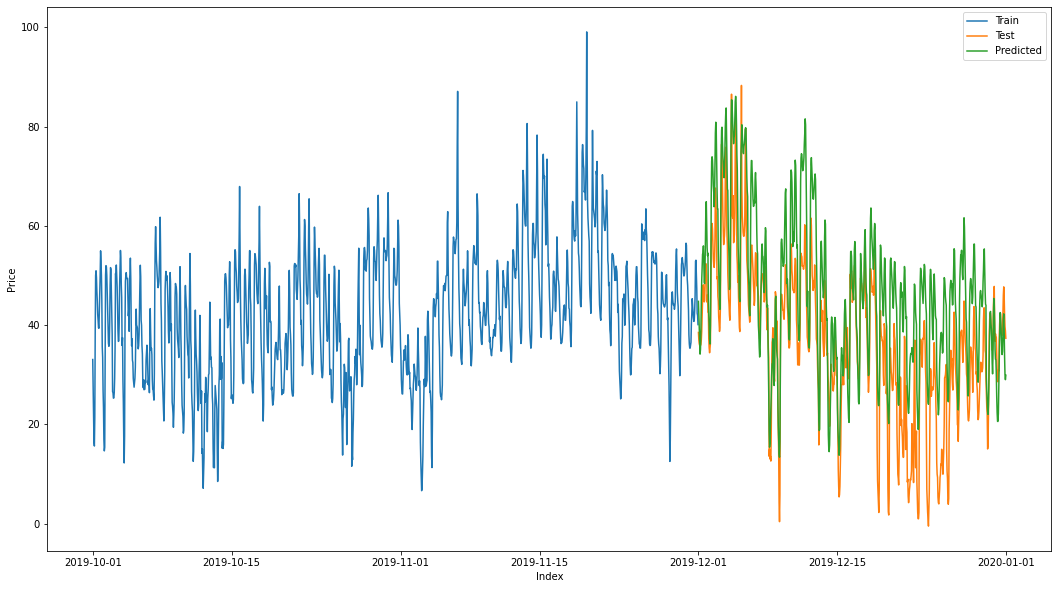

In [213]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,10))
axis = fig.gca()

# Create a new dataframe with y_pred and the same index as y_df_test
y_pred_df = pd.DataFrame(y_pred, columns=['y_pred'], index=y_df_test.index)

# Plot the actual and predicted values
plt.plot(y_df_train.loc['2019-10-01':], label='Train')
plt.plot(y_df_test, label='Test')
plt.plot(y_pred_df.loc['2019-12-01':'2020-01-02'], label='Predicted')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()
